# Iris data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Download the dataset
iris = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Iris.csv")

In [3]:
# Separate features and target
x = iris.drop("species", axis=1)
y = iris["species"]

In [6]:
# encode classes as numbers
y = LabelEncoder().fit_transform(y)

In [11]:
# Set aside data for testing and validation
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify = y, test_size=.2)
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,stratify = ytrain,test_size=.2)

In [12]:
# scaling
scaler = StandardScaler().fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)
xval = scaler.transform(xval)

In [16]:
# Check shape
# shape is rows and columns
xtrain.shape

(96, 4)

# Iris network

In [17]:
from tensorflow import keras
import seaborn as sns

In [47]:
# Design the network
# sequential API lets listing of layers
network = keras.models.Sequential([
    keras.Input(shape=(4,)), # 4 input layers - tuple only has 1d for now, 2d example = image
    keras.layers.Dense(2, activation = "relu"), # 2 = number of units in hidden layer
    keras.layers.Dense(3,activation ="softmax") # if 2 classes use "sigmoid", otherwise softmax
])

In [48]:
# Specify network compiling
network.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = keras.optimizers.Adam(learning_rate = 0.3))
  # loss = how to calc error
    # 3 classes = sparse_catagorical_crossentropy
    # 2 classes = binary_crossentropy

In [49]:
# train network
history = network.fit(xtrain,ytrain,epochs = 100, validation_data=(xval,yval), verbose = False)
# epochs = passes over data

In [50]:
# plot learning curves
curve = pd.DataFrame({"train":history.history["accuracy"], "val":history.history["val_accuracy"]})

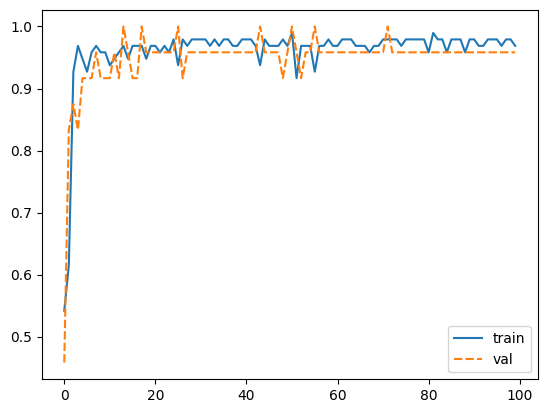

In [51]:
plot = sns.lineplot(data = curve)

In [52]:
# Try test data
network.evaluate(xtest,ytest)

1/1 [==============================] - 0s 37ms/step - loss: 0.0039 - accuracy: 1.0000


[0.003867201041430235, 1.0]

# Titanic data

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [70]:
# Download the dataset
titanic = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Titanic.csv")

In [71]:
# Drop the columns we don't want to use
titanic.drop(["name", "cabin"], axis=1, inplace=True)

In [72]:
# Separate features and target
x = titanic.drop("survived", axis=1)
y = titanic["survived"]

In [73]:
# Set aside data for testing and validation
xtrain,xtest,ytrain,ytest = train_test_split(x,y,stratify = y, test_size=.2)
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,stratify = ytrain,test_size=.2)

In [74]:
transformer = make_column_transformer(
    (OneHotEncoder(drop = "first"), ["sex"]),
    (make_pipeline(SimpleImputer(add_indicator = True), StandardScaler()),["age"]),
    remainder = StandardScaler()
)

In [75]:
# Apply Data processing
transformer.fit(xtrain)
xtrain = transformer.transform(xtrain)
xtest = transformer.transform(xtest)
xval = transformer.transform(xval)

In [76]:
xtrain.shape

(569, 6)

# Titanic network

In [89]:
# Design the network
# sequential API lets listing of layers
network = keras.models.Sequential([
    keras.Input(shape=(6,)),
    keras.layers.Dense(3, activation = "relu"),
    keras.layers.Dense(1,activation ="sigmoid")
])

In [90]:
network.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = keras.optimizers.Adam())


In [92]:
history = network.fit(xtrain,ytrain,epochs = 200, validation_data=(xval,yval), verbose = False)


In [93]:
curve = pd.DataFrame({"train":history.history["accuracy"], "val":history.history["val_accuracy"]})

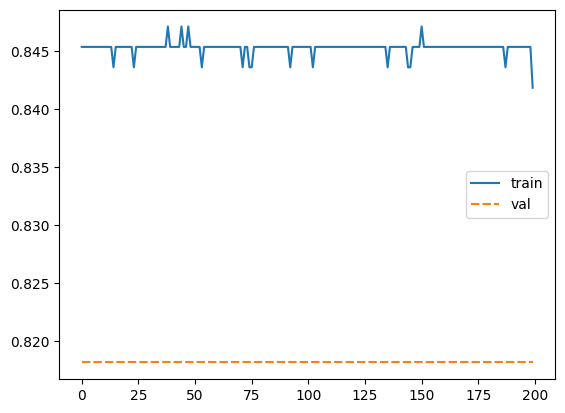

In [94]:
plot = sns.lineplot(data = curve)